In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from scipy.stats import loguniform
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

### 1. General summary

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# train.info()

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 2. Checking for missing values

In [6]:
def missing_df(df):
    perc_missing = (df.isnull().sum() * 100 / len(df)).round(2)
    missing_value_df = pd.DataFrame({'num_missing': df.isnull().sum(),
                                     'perc_missing': perc_missing})
    missing_value_df = missing_value_df[missing_value_df.num_missing != 0]
    return missing_value_df.sort_values(by='perc_missing', ascending=False)

In [7]:
missing_df(train)

,num_missing,perc_missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


### 3. Target variable (SalePrice) distribution

In [9]:
def show_dist(df, var):
    fig = plt.figure(constrained_layout=True, figsize=(8, 4))
    grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram of %s' % var)
    sns.distplot(train.loc[:, var], norm_hist=True, ax=ax1);
    
    ax2 = fig.add_subplot(grid[0, 2])
    ax2.set_title('Box Plot of %s' % var)
    sns.boxplot(y=df.loc[:, var], ax=ax2);

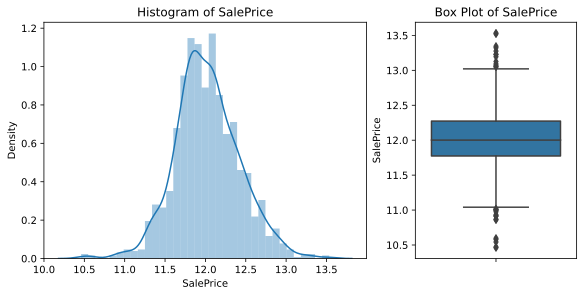

In [335]:
show_dist(train, 'SalePrice')

In [11]:
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


###  4. SalePrice vs 'Other Features'

In [12]:
abs(train.corr()['SalePrice']).sort_values(ascending = False)[1:].to_frame('correlation')

,correlation
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


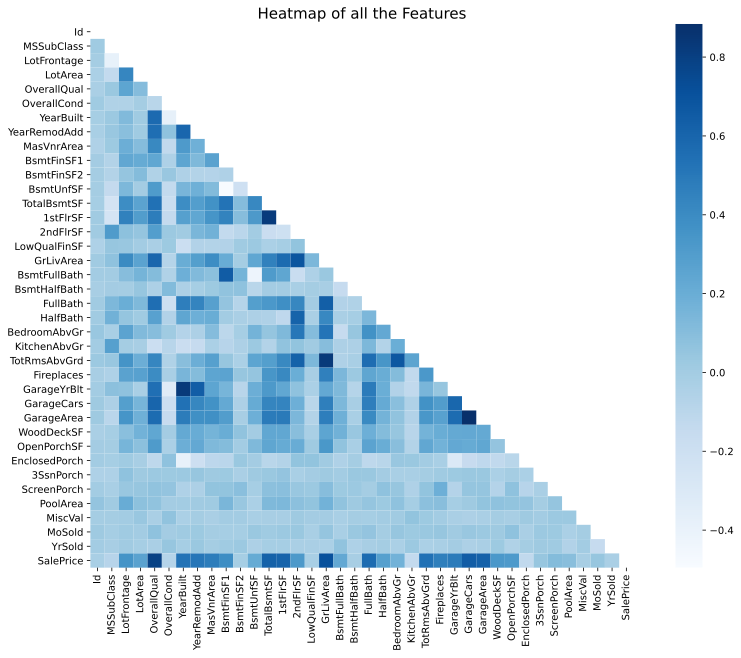

In [13]:
plt.subplots(figsize = (15, 10))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), cmap="Blues", 
            mask = mask, square=True);
plt.title("Heatmap of all the Features", fontsize=15);

### 5. SalePrice vs OverallQual

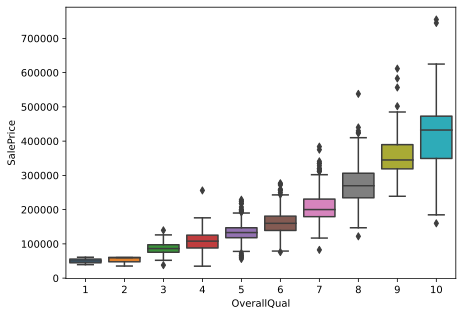

In [14]:
plt.subplots(figsize = (7, 5))
sns.boxplot(x=train['OverallQual'], y=train['SalePrice']);

### 6. SalePrice vs GrLivArea

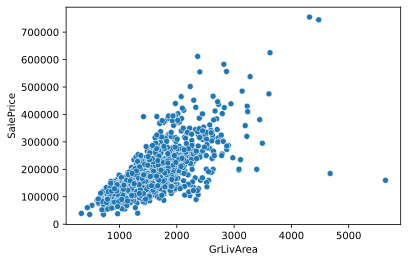

In [15]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice']);

### 7. SalePrice vs GarageArea

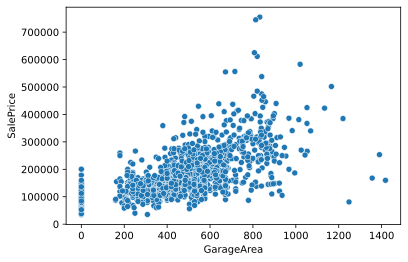

In [16]:
sns.scatterplot(x=train['GarageArea'], y=train['SalePrice']);

### 8. SalePrice vs TotalBsmtSF

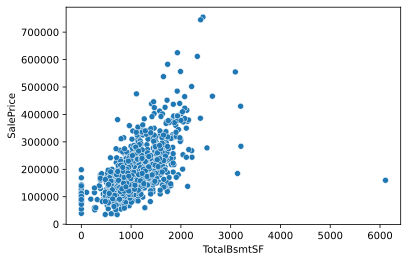

In [17]:
sns.scatterplot(x=train['TotalBsmtSF'], y=train['SalePrice']);

### 9. SalePrice vs 1stFlrSF

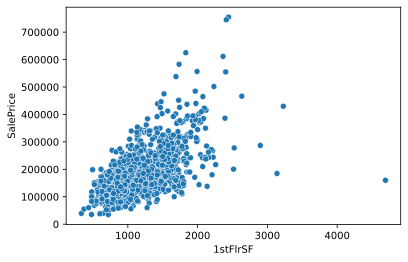

In [18]:
sns.scatterplot(x=train['1stFlrSF'], y=train['SalePrice']);

## Feature Engineering

### 1. Removing outliers

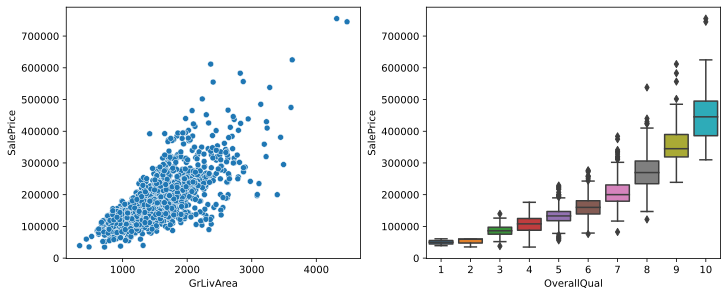

In [19]:
train = train[train.GrLivArea < 4500]
train.drop(train[(train['OverallQual'] == 4) & (train['SalePrice'] > 200000)].index, inplace=True)
train.reset_index(drop = True, inplace = True)

fig = plt.figure(constrained_layout=True, figsize=(10, 4))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    
ax1 = fig.add_subplot(grid[0, 0])
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice']);    

ax2 = fig.add_subplot(grid[0, 1])
sns.boxplot(x=train['OverallQual'], y=train['SalePrice']);

### 2. Fixing SalePrice Skewness

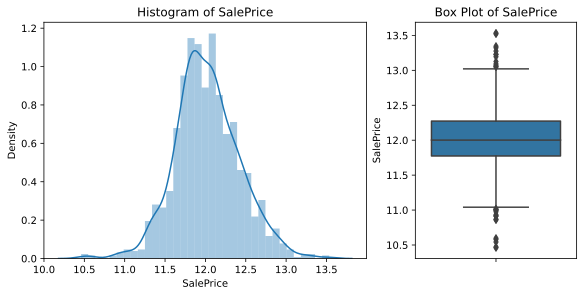

In [20]:
train['SalePrice'] = np.log1p(train['SalePrice'])
show_dist(train, 'SalePrice')

In [21]:
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 0.12304515868289599
Kurtosis: 0.8076181684911363


### 3. All Data (from this point, all engineering will be held on both training and test data)

In [22]:
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)
y = train['SalePrice'].reset_index(drop=True)

In [23]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

### 3. Handling missing values

In [24]:
missing_df(all_data)

,num_missing,perc_missing
PoolQC,2907,99.69
MiscFeature,2811,96.40
Alley,2718,93.21
Fence,2345,80.42
FireplaceQu,1420,48.70
LotFrontage,485,16.63
GarageFinish,159,5.45
GarageQual,159,5.45
GarageCond,159,5.45
GarageYrBlt,159,5.45


In [25]:
cat_val_missing = ['PoolQC',
                  'MiscFeature',
                  'Alley',
                  'Fence',
                  'FireplaceQu',
                  'GarageType',
                   'GarageFinish',
                   'GarageQual',
                   'GarageCond',
                   'BsmtExposure',
                   'BsmtFinType2',
                   'BsmtFinType1',
                   'BsmtCond',
                   'BsmtQual',
                   'MasVnrType']

for val in cat_val_missing:
    all_data[val] = all_data[val].fillna('None')

In [26]:
num_val_missing = ['GarageYrBlt',
                  'MasVnrArea',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                   'GarageArea',
                   'GarageCars',
                   'TotalBsmtSF',
                   'BsmtUnfSF',
                   'BsmtFinSF2',
                   'BsmtFinSF1']

for val in num_val_missing:
    all_data[val] = all_data[val].fillna(0)

In [27]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd') 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr') 
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA') 
all_data['SaleType'] = all_data['SaleType'].fillna('WD')

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [28]:
missing_df(all_data)

,num_missing,perc_missing


### 4. Fixing Features Skewness

In [29]:
num_features = all_data.dtypes[all_data.dtypes != 'object'].index.values
skew_features = all_data[num_features].apply(lambda x: x.skew()).sort_values(ascending=False)

In [30]:
skew_features.to_frame('Skewness')

,Skewness
MiscVal,21.947201
PoolArea,17.694707
LotArea,13.269377
LowQualFinSF,12.088646
3SsnPorch,11.375940
KitchenAbvGr,4.301911
BsmtFinSF2,4.145816
EnclosedPorch,4.003630
ScreenPorch,3.946335
BsmtHalfBath,3.931219


In [31]:
def fix_skewness(skew_features):
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    to_fix = skew_features[abs(skew_features) > 0.61]
    for feature in to_fix.index:
        all_data[feature] = boxcox1p(all_data[feature], boxcox_normmax(all_data[feature] + 1))

In [32]:
fix_skewness(skew_features)

### 5. Creating New Features

In [33]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBathrooms'] = all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtFullBath'] + all_data['BsmtHalfBath']
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch'] + all_data['WoodDeckSF']

all_data['HasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['Has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### 6. Deleting Some Features

In [34]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

### 7. Categorical Features Encoding

In [35]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [36]:
all_data.shape

(2916, 331)

### 8. Recreate training and test sets

In [297]:
X = all_data.iloc[:len(y), :]
X_sub = all_data.iloc[len(y):, :]

### 9. Features Scaling

In [38]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X_test = scaler.transform(X_test) not for all models, maybe later in PipeLine

## Training Model

### 1. Train Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

### 2. Fitting Models

In [209]:
def create_models():
    ridge = Ridge(random_state=42)
    lasso = Lasso(alpha=0.001, random_state=42)
    xgb = XGBRegressor(learning_rate=0.01, n_estimators=2000, max_depth=3, random_state=42)
    svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon= 0.01, gamma=0.001)) 
    # Stacking is the last step
    
    return [ridge, lasso, xgb, svr]

In [238]:
def fit_models(X_train, y_train, models):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {'MSE': 'neg_mean_squared_error',
               'R^2': 'r2'} # our goal is RMSE, however let's check R^2 as well
    cv_results = []
    
    for model in models:
        cv_model = cross_validate(model, X_train, y_train, scoring=scoring, cv=kfold)
        cv_results.append([np.sqrt((-1)*cv_model['test_MSE'].mean()), cv_model['test_R^2'].mean()])
    
    return cv_results

In [141]:
def show_cv_results(cv_results):
    cvr_df = pd.DataFrame(index=['Ridge', 'Lasso', 'XGBoost', 'SVR'], data=cv_results, columns=['RMSE', 'R^2'])
    return cvr_df

In [239]:
models = create_models()
cv_results = fit_models(X_train, y_train, models)
show_cv_results(cv_results)

,RMSE,R^2
Ridge,0.120016,0.907551
Lasso,0.111321,0.920681
XGBoost,0.122171,0.904657
SVR,0.118249,0.910906


### 3. Hyperparameter Tuning

In [211]:
def model_tuning(X_train, y_train, model, params):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='neg_mean_squared_error', cv=kfold)
    random_search.fit(X_train, y_train)
    
    return random_search

In [216]:
def tune_all_models(X_train, y_train, models, params_list):
    final_models = []
    final_results = []
    
    for model, params in zip(models, params_list):
        random_search = model_tuning(X_train, y_train, model, params)
        final_models.append(random_search.best_estimator_)
        final_results.append(np.sqrt((-1)*model_tuning(X_train, y_train, model, params).best_score_))
        
    return (final_models, final_results)

In [235]:
def show_tuninig_results(final_results):
    tuning_df = pd.DataFrame(index=['Ridge', 'Lasso', 'XGBoost', 'SVR'], data=final_results, columns=['RMSE'])
    return tuning_df.sort_values(by='RMSE')

In [224]:
params_list = [{'alpha': loguniform(0.01, 100)}, 
               {'alpha': loguniform(1e-3, 10)},
               {'n_estimators': [3000],
                'learning_rate': [0.1, 0.01],
                'max_depth': [2, 3, 4]},
               {'svr__C': loguniform(0.1, 30),
                'svr__gamma': loguniform(1e-5, 1),
                'svr__epsilon': loguniform(1e-3, 1)}]

tuning = tune_all_models(X_train, y_train, models, params_list)
final_models = tuning[0]
final_results = tuning[1]

In [236]:
show_tuninig_results(final_results)

,RMSE
Lasso,0.111955
Ridge,0.113784
SVR,0.119720
XGBoost,0.119838


#### As you can see, we can't squeeze a lot more from our models using Hyperparameter Tuning.

### 4. Stacking

In [245]:
def cv_rmse(model, X_train, y_train):
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse = np.sqrt((-1)*cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return rmse.mean()

In [246]:
estimators = [('Ridge', final_models[0]),
             ('Lasso', final_models[1]),
             ('XGBoost', final_models[2]),
             ('SVR', final_models[3])]

stacking = StackingRegressor(estimators=estimators, final_estimator=final_models[2])
cv_rmse(stacking, X_train, y_train)

0.11456434890692435

## 5. Final Model

### 1. Fitting Final Models

In [262]:
ridge = final_models[0].fit(X, y)

In [263]:
lasso = final_models[1].fit(X, y)

In [264]:
xgb = final_models[2].fit(X, y)

In [265]:
svr = final_models[3].fit(X, y)

In [267]:
stacking = stacking.fit(X, y)

### 2. Blending Predictions

In [328]:
def blend_predictions(X):
    return ((0.5 * stacking.predict(X)) + \
            (0.25 * xgb.predict(X)) + \
            (0.1 * ridge.predict(X)) + \
            (0.1 * svr.predict(X)) + \
            (0.05 * lasso.predict(X)))

In [289]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [290]:
rmsle(y, blend_predictions(X))

0.08333902849969126

### 3. Submitting result

In [329]:
submission = pd.read_csv('sample_submission.csv')
submission.shape

(1459, 2)

In [330]:
submission.iloc[:, 1] = np.floor(np.expm1(blend_predictions(X_sub)))

In [331]:
submission.to_csv("submission_kaggle.csv", index=False)